<a href="https://colab.research.google.com/github/CameliaRegista03/Klasifikasi-Gambar-Rockpaperscissors/blob/main/Klasifikasi_Kertas_Gunting_Batu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CEK** **VERSI** **TENSORFLOW**
modul latihan membuat klasifikasi gambar tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## **IMPORT** **TENSORFLOW**
modul latihan membuat klasifikasi gambar tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **MENYIAPKAN** **DATANYA**
modul latihan membuat klasifikasi gambar tensorflow

In [ ]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip

--2021-05-12 07:38:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  9.40MB/s    in 26s     

2021-05-12 07:39:07 (11.7 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



## **EKSTRAKSI** **FILE** **ZIP**
modul latihan membuat gambar tensorflow

In [ ]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/rps')
zip_ref.close()

## **MENGINSTALL** **FOLDER** **SPLIT**

In [ ]:
!pip install split-folders

## **IMPORT** **SPLITFOLDERS**

In [ ]:
base_dir = '/rps/rockpaperscissors/rps-cv-images'

import splitfolders
splitfolders.ratio(base_dir, base_dir, ratio=(0.6,0.4))
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir(train_dir)
os.listdir(validation_dir)

Copying files: 2188 files [00:00, 2677.45 files/s]


['scissors', 'paper', 'rock']

## **MENAMPUNG** **DIREKTORI** **CLASS**

In [ ]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'train')

# Direktori validation
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'train')

## **MEMBUAT** **IMAGEDATAGENERATOR**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)


### **MEMPERSIAPKAN** **DATA** **LATIH**

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size =(224, 224),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=42)
validation_generator = test_datagen.flow_from_directory(
   validation_dir,
   target_size =(224, 224),
   batch_size=32, 
   color_mode='rgb',
   class_mode='categorical',
   shuffle = True,
   seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


### **VISUALISASI DAN VALIDASI**

In [ ]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

### **MENGUNAKAN** **FUNGSI** **PLOTIMAGES**

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
      ax.imshow(img)
      ax.axis('off')
    plt.tight_layout()
    plt.show()

### **IMPORT** **MATPLOTLIB**

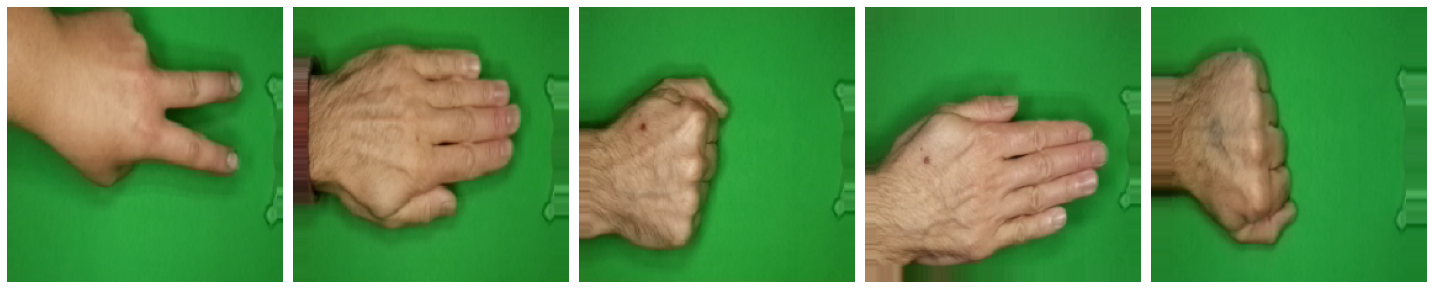

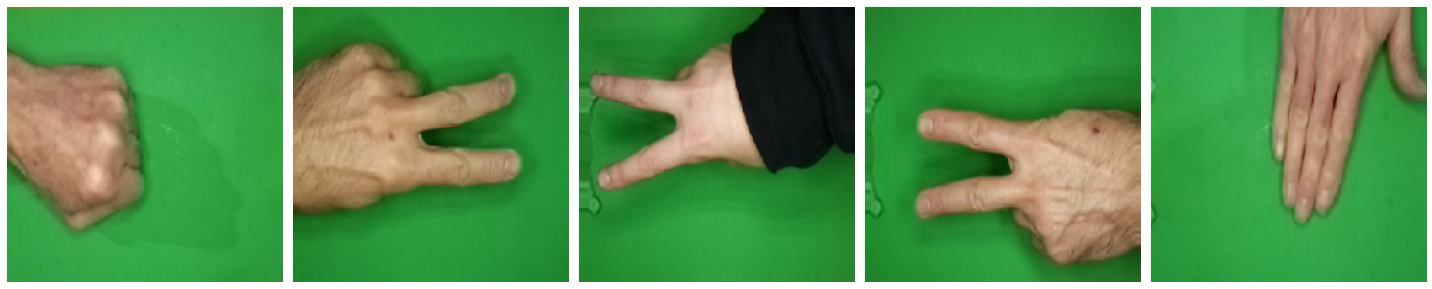

In [ ]:
import matplotlib.pyplot as plt
plotImages(sample_train_images[:5])
plotImages(sample_val_images[:5])

### **MODEL** **SEQUENTIAL**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

### **MEMANGGIL** **FUNGSI** **COMPILE**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
historrry = model.fit(train_generator,
                      steps_per_epoch=25,
                      epochs=20,
                      validation_data=validation_generator,
                      validation_steps=5,
                      verbose=1)

Epoch 1/20
25/25 [==============================] - 45s 606ms/step - loss: 1.2315 - accuracy: 0.3972 - val_loss: 0.7143 - val_accuracy: 0.7625
Epoch 2/20
25/25 [==============================] - 15s 581ms/step - loss: 0.6446 - accuracy: 0.7603 - val_loss: 0.2756 - val_accuracy: 0.9438
Epoch 3/20
25/25 [==============================] - 14s 582ms/step - loss: 0.3945 - accuracy: 0.8635 - val_loss: 0.2296 - val_accuracy: 0.9250
Epoch 4/20
25/25 [==============================] - 14s 581ms/step - loss: 0.2462 - accuracy: 0.9057 - val_loss: 0.2557 - val_accuracy: 0.8813
Epoch 5/20
25/25 [==============================] - 14s 579ms/step - loss: 0.2293 - accuracy: 0.9195 - val_loss: 0.3901 - val_accuracy: 0.8562
Epoch 6/20
25/25 [==============================] - 14s 578ms/step - loss: 0.1900 - accuracy: 0.9269 - val_loss: 0.2001 - val_accuracy: 0.9062
Epoch 7/20
25/25 [==============================] - 14s 580ms/step - loss: 0.1781 - accuracy: 0.9339 - val_loss: 0.1340 - val_accuracy: 0.9500

### **IMPORT MATPLOTLIB**

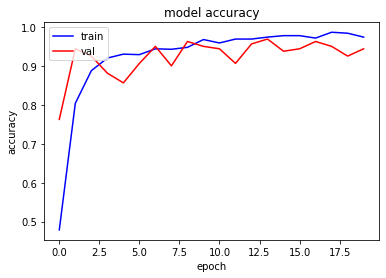

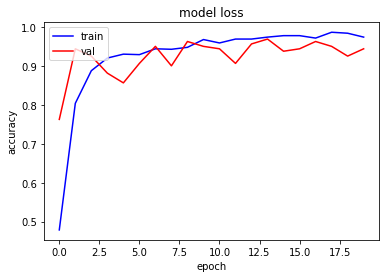

In [ ]:
import matplotlib.pyplot as plt
acc = historrry.history['accuracy']
val_acc = historrry.history['val_accuracy']

loss = historrry.history['loss']
val_loss = historrry.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **MENGUBAH UKURAN & MEMPREDIKSI DATA LARIK NUMPY**

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (1).png
ROCK


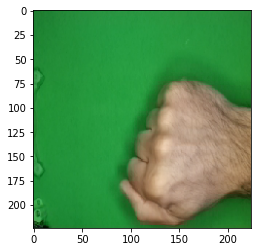

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')